<a href="https://colab.research.google.com/github/davidofitaly/course_notes_data-science-bootcamp-w-j-zyku-python---od-A-do-Z-12.5h-/blob/main/02_analiza_danych/09_dataframe_obliczanie_nowych_kolumn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
def fetch_financial_data(company='UBER'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 841 entries, 2022-09-09 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    841 non-null    float64
 1   High    841 non-null    float64
 2   Low     841 non-null    float64
 3   Close   841 non-null    float64
 4   Volume  841 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 39.4 KB


In [4]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-09-09,31.00,32.050,30.8900,31.78,28055864
2022-09-08,29.42,30.900,29.2900,30.68,29393512
2022-09-07,28.91,30.150,28.8200,30.03,20632173
2022-09-06,29.34,29.370,28.2800,28.89,20422802
2022-09-02,29.50,29.635,28.6499,29.05,14604356


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,841.000000,841.000000,841.000000,841.000000,8.410000e+02
mean,38.365640,39.144585,37.491572,38.315101,2.562928e+07
std,9.812623,9.881370,9.674447,9.755769,1.687469e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,31.200000,31.980000,30.480000,31.190000,1.546652e+07
50%,36.500000,37.330000,35.500000,36.490000,2.178659e+07
75%,45.030000,45.980000,44.165000,45.000000,3.121226e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [8]:
df.head(3)

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2022-09-09,31.00,32.05,30.89,31.78,28055864,31.39
2022-09-08,29.42,30.90,29.29,30.68,29393512,30.05
2022-09-07,28.91,30.15,28.82,30.03,20632173,29.47


In [10]:
df['Average'] = (df.Open + df.Close) /2
df.head(10)

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2022-09-09,31.00,32.0500,30.8900,31.78,28055864,31.390
2022-09-08,29.42,30.9000,29.2900,30.68,29393512,30.050
2022-09-07,28.91,30.1500,28.8200,30.03,20632173,29.470
2022-09-06,29.34,29.3700,28.2800,28.89,20422802,29.115
2022-09-02,29.50,29.6350,28.6499,29.05,14604356,29.275
2022-09-01,28.17,28.9500,27.6900,28.92,17828091,28.545
2022-08-31,29.11,29.8799,28.7500,28.76,20740662,28.935
2022-08-30,29.18,29.2900,28.1200,28.71,24409322,28.945
2022-08-29,28.10,29.1900,28.0600,28.74,17245101,28.420


In [11]:
# sort_index /sortuje indeksy

df = df.sort_index()
df.head(10)

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240
2019-05-17,41.98,43.29,41.27,41.91,20225687,41.945
2019-05-20,41.19,41.68,39.46,41.59,29222330,41.390
2019-05-21,42.00,42.24,41.25,41.50,10802851,41.750
2019-05-22,41.05,41.28,40.50,41.25,9089469,41.150


In [13]:
# shift przesuniecie wierszu

df['Close_shift'] = df.Close.shift()
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [19]:
df['Daily_change'] = (df.Close / df.Close_shift - 1)
df.head(10)

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.29,41.27,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.46,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.25,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.50,41.25,9089469,41.150,41.50,-0.006024


In [20]:
# del usuwanie kolumny

del df['Volume']
df.head()

,Open,High,Low,Close,Average,Close_shift,Daily_change
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,42.240,41.29,0.041414


In [21]:
df.Daily_change.min()

-0.21628767847699626

In [29]:
df.Daily_change.nsmallest(5)

Date
2020-03-18   -0.216288
2020-03-12   -0.138338
2022-05-09   -0.115842
2020-03-09   -0.110795
2019-05-13   -0.107529
Name: Daily_change, dtype: float64

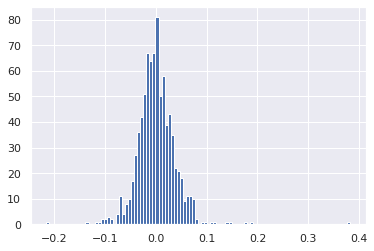

In [31]:
import seaborn as sns
sns.set()
df.Daily_change.hist(bins=100)


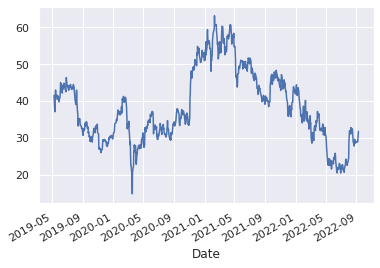

In [35]:
df.Close.plot()